**Exploratory Data Analysis IMDB Movies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv("imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
print("Number of rows", df.shape[0])
print("number of colums", df.shape[1])

Number of rows 10178
number of colums 12


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10173    False
10174    False
10175    False
10176    False
10177    False
Length: 10178, dtype: bool

In [ ]:
df.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [ ]:
df["date_x"] = pd.to_datetime(df["date_x"])

In [ ]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe().T.style.format('{:,.2F}')

,count,mean,std,min,25%,50%,75%,max
score,"10,052.00",63.83,12.78,0.00,59.00,65.00,71.00,100.00
budget_x,"10,052.00","64,125,276.59","56,658,516.67",1.00,"14,397,627.25","50,000,000.00","104,000,000.00","460,000,000.00"
revenue,"10,052.00","251,204,924.10","276,549,495.18",0.00,"27,687,812.00","149,328,803.80","416,157,754.65","2,923,706,026.00"


<Axes: title={'center': 'Correlation between Revenue vs Score vs Budget'}>

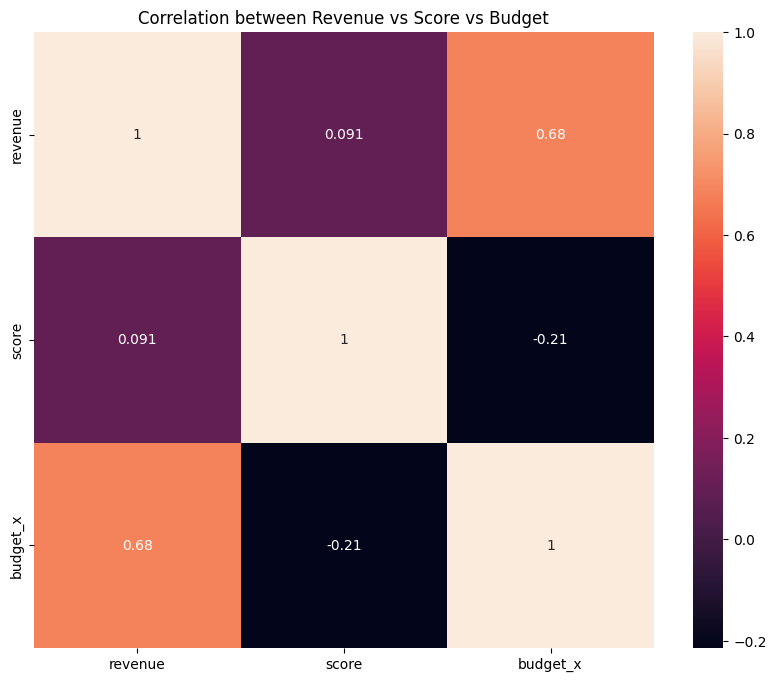

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation between Revenue vs Score vs Budget')
corr = df[["revenue", "score", "budget_x"]].corr()
sns.heatmap(corr, annot=True)

<BarContainer object of 10 artists>

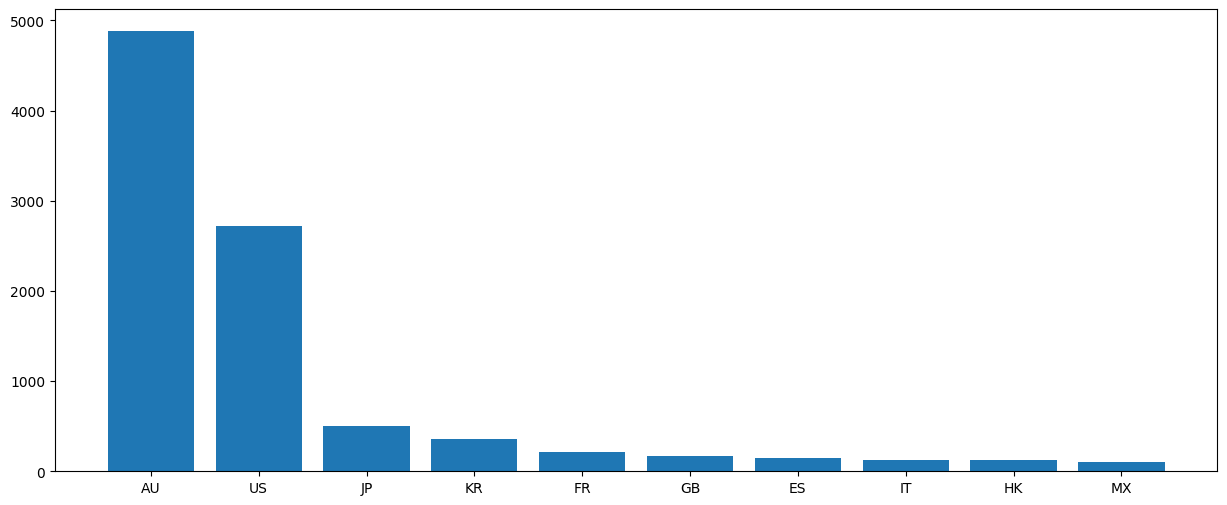

In [ ]:
x = df["country"].value_counts().head(10)
plt.figure(figsize=(15,6))
plt.bar(x.index, height=x)

In [ ]:
top_10_revenues = df.sort_values("revenue", ascending=True)[-10:]
top_10_revenues

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
2156,BTS: Permission to Dance on Stage - LA,2022-09-08,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000.0,1.748017e+09,KR
76,Spider-Man: No Way Home,2021-12-16,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,200000000.0,1.910048e+09,AU
104,Avengers: Infinity War,2018-04-25,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,300000000.0,2.048360e+09,AU
943,Star Wars: The Force Awakens,2015-12-17,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,245000000.0,2.068224e+09,AU
4483,Louis Tomlinson: All of Those Voices,2023-03-22,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000.0,2.081794e+09,GB
309,Titanic,1997-12-18,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000.0,2.222986e+09,AU
6670,Titanic,1953-04-11,66.0,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000.0,2.222986e+09,US
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
230,Avengers: Endgame,2019-04-24,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,2.923706e+09,AU


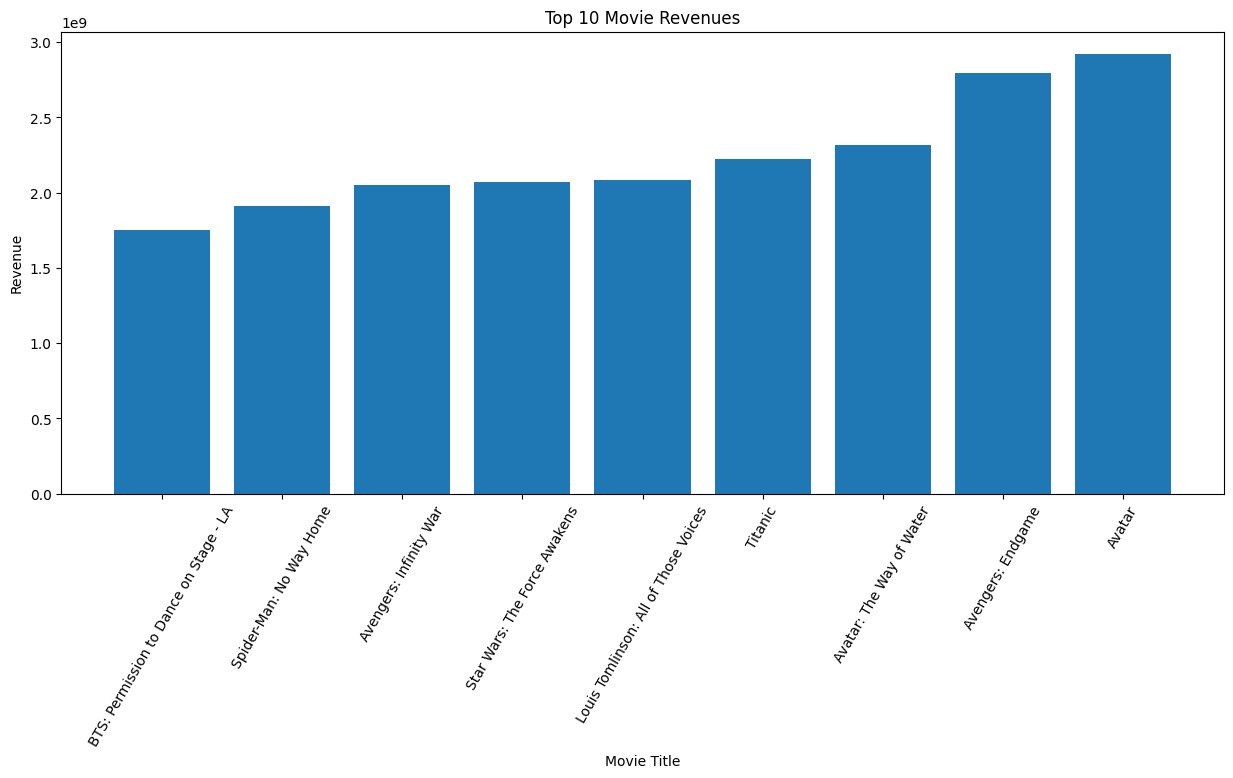

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(top_10_revenues['names'], top_10_revenues['revenue'])
plt.xticks(rotation=60)
plt.title('Top 10 Movie Revenues')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.show()

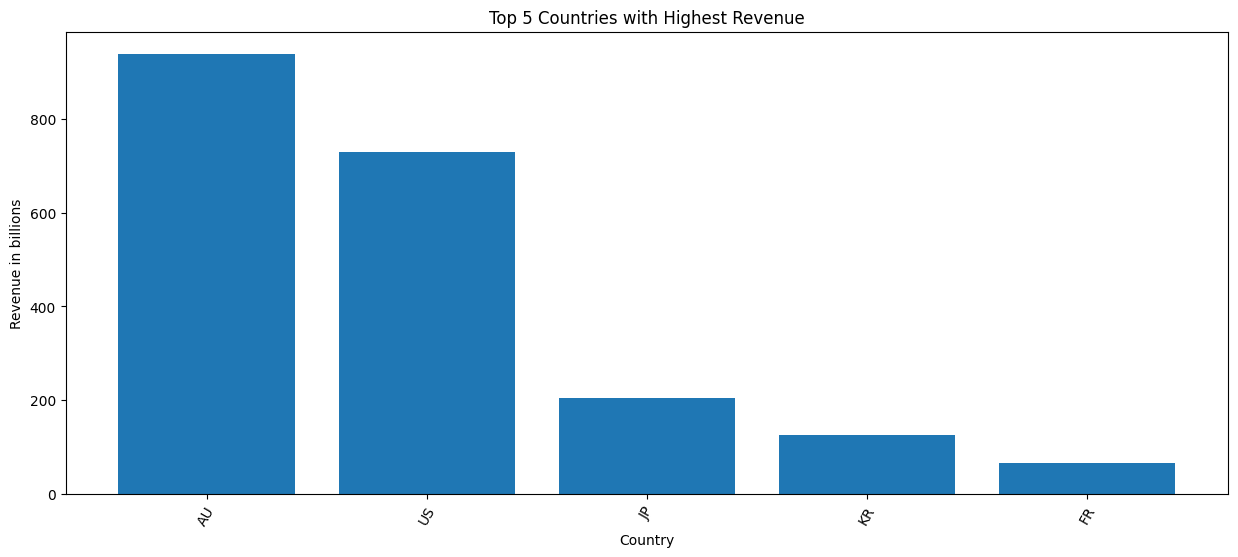

In [ ]:
revenue_by_country = df.loc[:, ['country', 'revenue']]
revenue_by_country = revenue_by_country.groupby('country').sum()
top_5_countries = revenue_by_country.nlargest(5, 'revenue')

plt.figure(figsize=(15,6))
plt.bar(top_5_countries.index, top_5_countries['revenue']/1000000000)
plt.title('Top 5 Countries with Highest Revenue')
plt.xticks(rotation=60)
plt.xlabel('Country')
plt.ylabel('Revenue in billions')
plt.show()

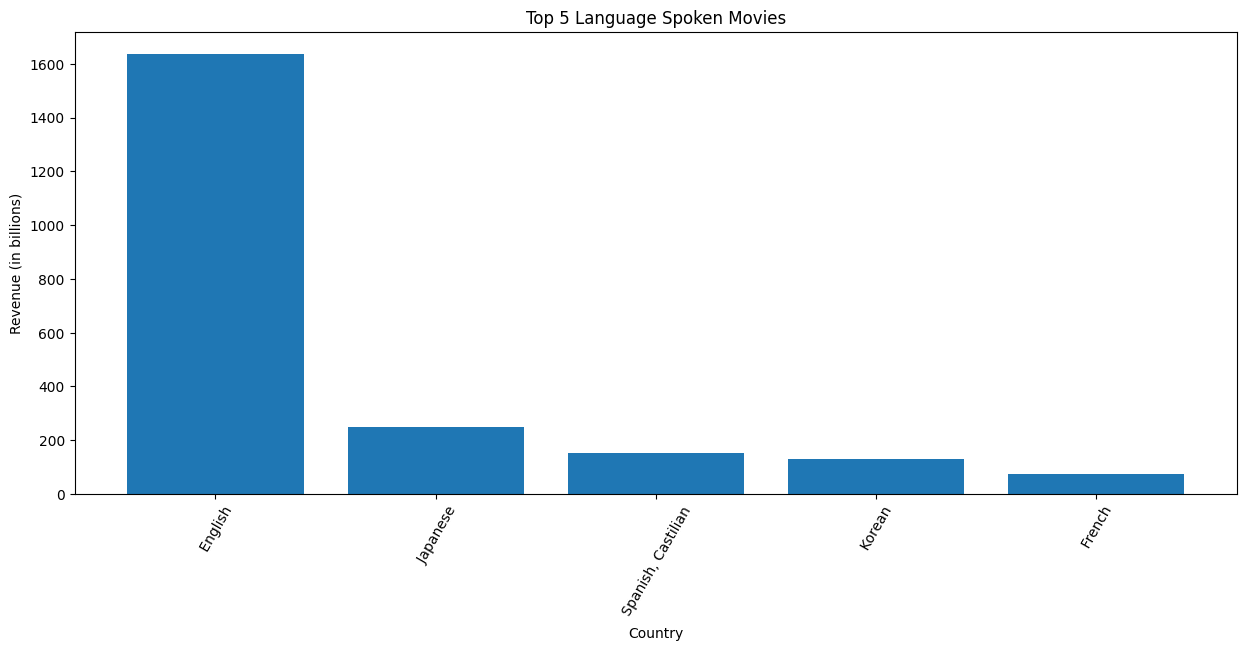

In [ ]:
revenue_by_lang = df.loc[:, ['orig_lang', 'revenue']]
revenue_by_lang = revenue_by_lang.groupby('orig_lang').sum()
top_5_langs = revenue_by_lang.nlargest(5, 'revenue')

plt.figure(figsize=(15,6))
plt.bar(top_5_langs.index, top_5_langs['revenue']/1000000000)
plt.title('Top 5 Language Spoken Movies')
plt.xticks(rotation=60)
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')
plt.show()

In [ ]:
y = df["orig_lang"].value_counts().index.tolist()[0:9]
print(y)

[' English', ' Japanese', ' Spanish, Castilian', ' Korean', ' French', ' Chinese', ' Italian', ' Cantonese', ' German']


In [ ]:
x = df["orig_lang"].value_counts().unique()[0:9]
print(x)

[7381  675  388  384  282  144  142  141   89]


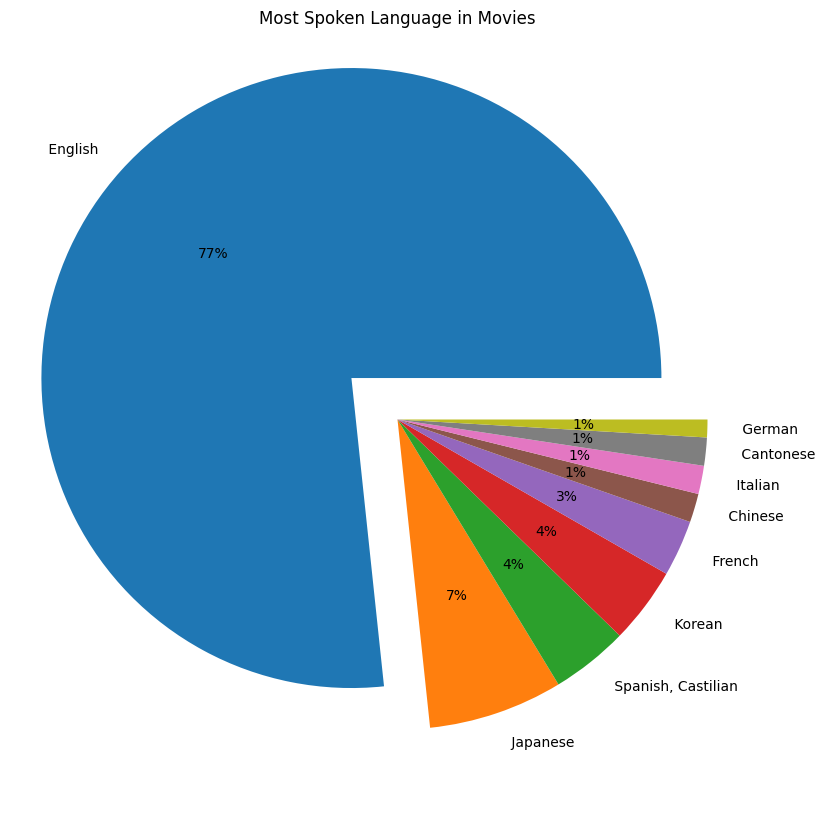

In [ ]:
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.title('Most Spoken Language in Movies')
plt.pie(x, labels = y, explode = myexplode,autopct="%0.0f%%")
plt.show()

In [ ]:
v = df["genre"].value_counts().index.tolist()[0:9]
print(v)

['Drama', 'Comedy', 'Drama,\xa0Romance', 'Horror', 'Horror,\xa0Thriller', 'Comedy,\xa0Romance', 'Documentary', 'Action,\xa0Thriller', 'Comedy,\xa0Drama']


In [ ]:
w = df["genre"].value_counts().unique()[0:9]
print(w)

[556 373 268 258 202 187 131 122 121]


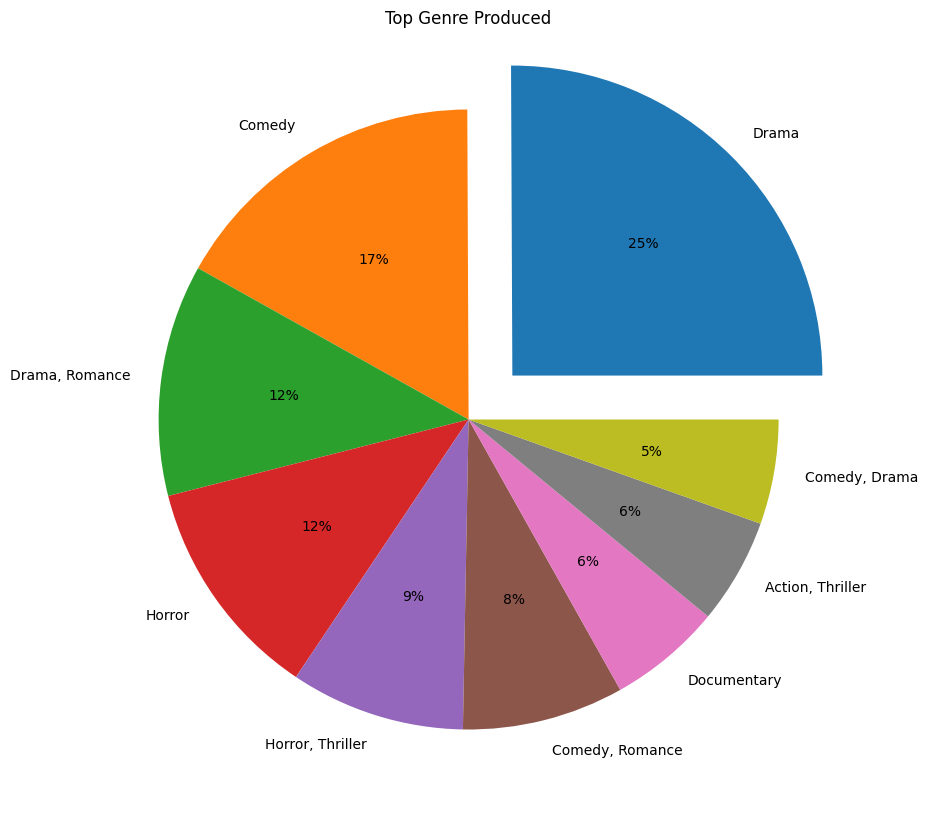

In [ ]:
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.title('Top Genre Produced')
plt.pie(w, labels = v, explode = myexplode,autopct="%0.0f%%")
plt.show()

In [ ]:
df["date_x"].dt.year.value_counts().sort_index()

1903      1
1907      1
1915      2
1920      1
1923      3
       ... 
2019    465
2020    448
2021    618
2022    935
2023    373
Name: date_x, Length: 99, dtype: int64

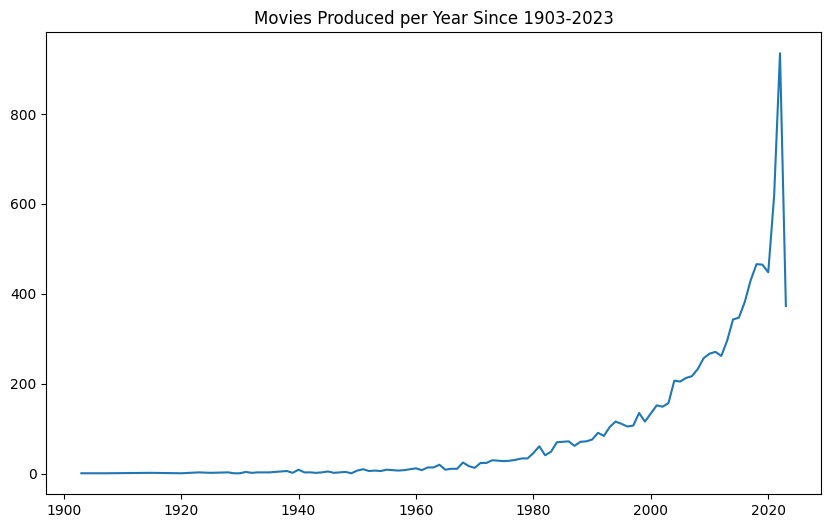

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Movies Produced per Year Since 1903-2023')
plt.plot(df["date_x"].dt.year.value_counts().sort_index())

** *ข้อความตัวเอียง*Movies Recommender System**

Content Based Recommender

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
#from surprise import Reader, Dataset, SVD, evaluate
from surprise import SVD, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

In [ ]:
df['overview'] = df['overview'].fillna('')

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['overview'])

In [ ]:
tfidf_matrix.shape

(10052, 235377)

*Cosine* Similarity

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]

array([1.        , 0.0085417 , 0.00241403, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
df = df.reset_index()
titles = df['orig_title']
indices = pd.Series(df.index, index=df['orig_title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
get_recommendations('Avatar').head(10)

2236                   STAND BY ME ドラえもん
52                                    정이
688                           The Matrix
4497                     ドラえもん のび太と銀河超特急
1496                    Tears of the Sun
8309                           Apollo 18
4479                        The American
8693    What Ever Happened to Baby Jane?
8844                           Colonials
5001                         Bitter Moon
Name: orig_title, dtype: object

In [ ]:
get_recommendations('The Dark Knight').head(10)

2096     Batman: The Long Halloween, Part One
2324     Batman: The Long Halloween, Part Two
857                     The Dark Knight Rises
10011                     Batman vs. Two-Face
5206               Batman: Gotham by Gaslight
2118                                   Batman
3028                           Batman Forever
6400                         Batman: Year One
3774                 Batman: The Killing Joke
7552                                      JFK
Name: orig_title, dtype: object

In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]

    movies = df.iloc[movie_indices][['orig_title', 'score']]
    score_voter = movies[movies['score'].notnull()]['score'].astype('int')
    m = score_voter.quantile(0.60)
    qualified = movies[(movies['score'] >= m) & (movies['score'].notnull())]
    qualified['score'] = qualified['score'].astype('int')
    return qualified

In [ ]:
improved_recommendations('The Dark Knight')

,orig_title,score
2096,"Batman: The Long Halloween, Part One",75
2324,"Batman: The Long Halloween, Part Two",75
857,The Dark Knight Rises,78
7552,JFK,76
7764,Batman Unmasked: The Psychology of 'The Dark K...,75
2648,"Batman: The Dark Knight Returns, Part 2",80
3877,Batman: Under the Red Hood,78
131,The Batman,77
2659,"Batman: The Dark Knight Returns, Part 1",77
7199,Batman: Mask of the Phantasm,75
